<a href="https://colab.research.google.com/github/svargascpp/ECE4309FinalProject/blob/main/Cybersecurity_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading numpy, pandas, and matplotlib

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Loading the malicious urls list (local copy)

In [ ]:
data = pd.read_csv('/content/malicious_phish.csv')

#data.shape
cols = ['phishing','benign','defacement','malware']
data.columns = ['text','label']
data.head()

,text,label
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


Analyzing the data

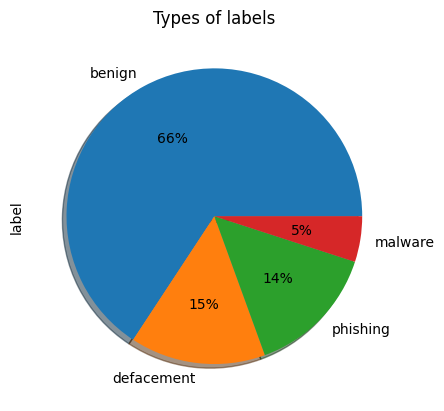

In [ ]:
plt.figure()

data['label'].value_counts().plot(kind='pie', autopct= '%1.0f%%', shadow=True)
plt.title('Types of labels')
plt.show()

In [ ]:
data.keys()

Index(['text', 'label'], dtype='object')

In [ ]:
data.text

0                                          br-icloud.com.br
1                       mp3raid.com/music/krizz_kaliko.html
2                           bopsecrets.org/rexroth/cr/1.htm
3         http://www.garage-pirenne.be/index.php?option=...
4         http://adventure-nicaragua.net/index.php?optio...
                                ...                        
651186              xbox360.ign.com/objects/850/850402.html
651187         games.teamxbox.com/xbox-360/1860/Dead-Space/
651188           www.gamespot.com/xbox360/action/deadspace/
651189        en.wikipedia.org/wiki/Dead_Space_(video_game)
651190            www.angelfire.com/goth/devilmaycrytonite/
Name: text, Length: 651191, dtype: object

In [ ]:
data.label

0           phishing
1             benign
2             benign
3         defacement
4         defacement
             ...    
651186      phishing
651187      phishing
651188      phishing
651189      phishing
651190      phishing
Name: label, Length: 651191, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])
X.shape

(651191, 590757)

Set up train/test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
text_train, text_test, label_train, label_test = train_test_split(X, data['label'], test_size = 0.2, random_state = 69)
print("text_train: ", text_train.shape)
print("label_train: ", label_train.shape)
print("text_test: ", text_test.shape)
print("label_test: ", label_test.shape)

print(pd.value_counts(label_train))

text_train:  (520952, 590757)
label_train:  (520952,)
text_test:  (130239, 590757)
label_test:  (130239,)
benign        342451
defacement     77182
phishing       75393
malware        25926
Name: label, dtype: int64


Data is setup, fit to a model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(text_train, label_train)

label_pred = knn_clf.predict(text_test)

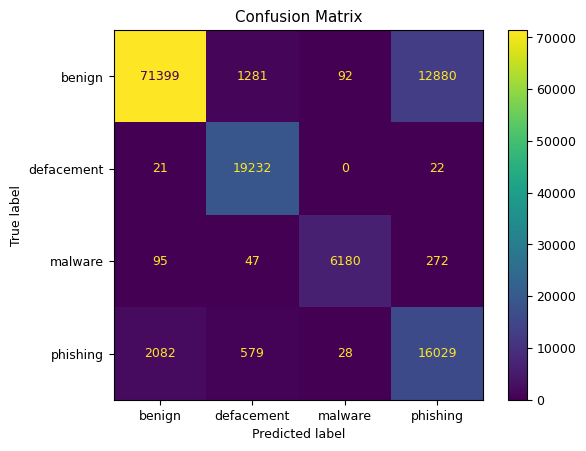

In [ ]:
plt.rc('font', size = 9)
ConfusionMatrixDisplay.from_predictions(label_test, label_pred)
plt.title('Confusion Matrix')
plt.show()

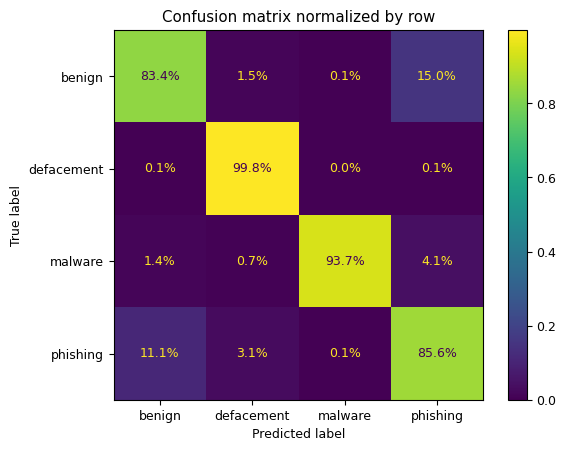

In [ ]:
ConfusionMatrixDisplay.from_predictions(label_test, label_pred, normalize='true', values_format='.01%')
plt.title('Confusion matrix normalized by row')
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(label_test, label_pred))
print("F1 Score: ", f1_score(label_test, label_pred, average = 'macro'))

Accuracy:  0.8664071437894947
F1 Score:  0.8690017934862972


KNeighbors did not perform very well

Perform testing on more classifiers

In [ ]:
dtree_clf = DecisionTreeClassifier(random_state = 69)

dtree_clf.fit(text_train, label_train)

DecisionTreeClassifier(random_state=69)

In [ ]:
label_pred_2 = dtree_clf.predict(text_test)

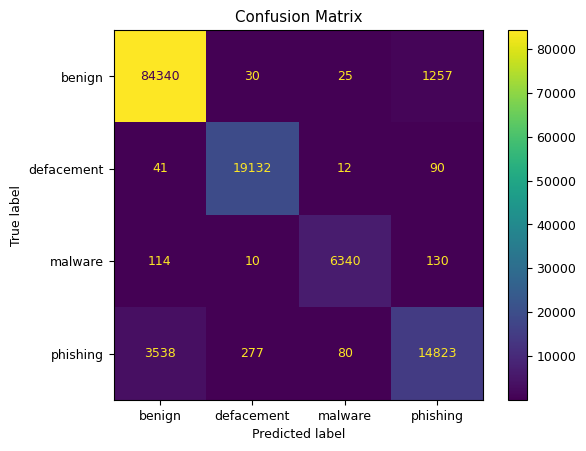

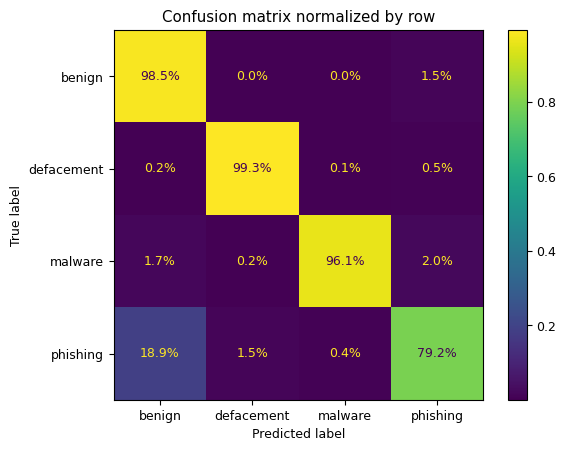

In [ ]:
plt.rc('font', size = 9)
ConfusionMatrixDisplay.from_predictions(label_test, label_pred_2)
plt.title('Confusion Matrix')
plt.show()
ConfusionMatrixDisplay.from_predictions(label_test, label_pred_2, normalize='true', values_format='.01%')
plt.title('Confusion matrix normalized by row')
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(label_test, label_pred_2))
print("F1 Score: ", f1_score(label_test, label_pred_2, average = 'macro'))

Accuracy:  0.9569714140925529
F1 Score:  0.9443676915942447


In [ ]:
rndf_clf = RandomForestClassifier(random_state = 69)

rndf_clf.fit(text_train, label_train)
label_pred_3 = rndf_clf.predict(text_test)

In [ ]:
plt.rc('font', size = 9)
ConfusionMatrixDisplay.from_predictions(label_test, label_pred_3)
plt.title('Confusion Matrix')
plt.show()
ConfusionMatrixDisplay.from_predictions(label_test, label_pred_3, normalize='true', values_format='.01%')
plt.title('Confusion matrix normalized by row')
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(label_test, label_pred_3))
print("F1 Score: ", f1_score(label_test, label_pred_3, average = 'macro'))

In [ ]:
sgd_clf = SGDClassifier()

sgd_clf.fit(text_train, label_train)
label_pred_4 = sgd_clf.predict(text_test)

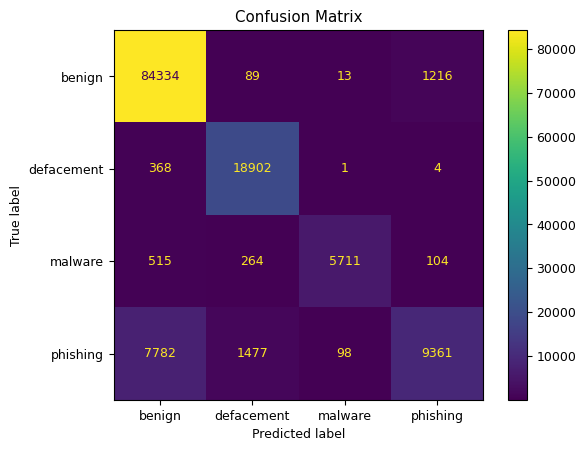

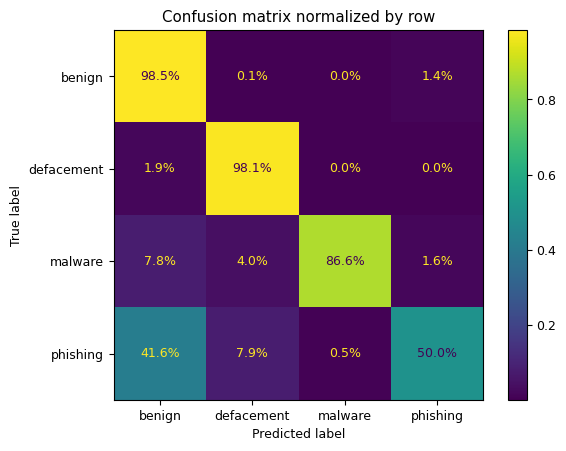

In [ ]:
plt.rc('font', size = 9)
ConfusionMatrixDisplay.from_predictions(label_test, label_pred_4)
plt.title('Confusion Matrix')
plt.show()
ConfusionMatrixDisplay.from_predictions(label_test, label_pred_4, normalize='true', values_format='.01%')
plt.title('Confusion matrix normalized by row')
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(label_test, label_pred_4))
print("F1 Score: ", f1_score(label_test, label_pred_4, average = 'macro'))

Accuracy:  0.908391495634948
F1 Score:  0.8614151018449158


In [ ]:
lrg_clf = LogisticRegression()

lrg_clf.fit(text_train, label_train)
label_pred_5 = lrg_clf.predict(text_test)

In [ ]:
plt.rc('font', size = 9)
ConfusionMatrixDisplay.from_predictions(label_test, label_pred_5)
plt.title('Confusion Matrix')
plt.show()
ConfusionMatrixDisplay.from_predictions(label_test, label_pred_5, normalize='true', values_format='.01%')
plt.title('Confusion matrix normalized by row')
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(label_test, label_pred_5))
print("F1 Score: ", f1_score(label_test, label_pred_5, average = 'macro'))

random forest and logistic regression not working. With best classifier being decision tree, moving on to grid search to fine tune hyperparameters.

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
param_grid = [{
    'criterion': ['gini','entropy','log_loss'],
    'splitter': ['best','random'],
    'max_features': ['sqrt','log2', None],
    'random_state': [69],
}]

hgsrchD_clf = HalvingGridSearchCV(dtree_clf, param_grid)
hgsrchD_clf.fit(text_train, label_train)

hgsrchD_clf.get_params()

{'aggressive_elimination': False,
 'cv': 5,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': 69,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(random_state=69),
 'factor': 3,
 'max_resources': 'auto',
 'min_resources': 'exhaust',
 'n_jobs': None,
 'param_grid': [{'criterion': ['gini', 'entropy', 'log_loss'],
   'splitter': ['best', 'random'],
   'max_features': ['sqrt', 'log2', None],
   'random_state': [69]}],
 'random_state': None,
 'refit': True,
 'resource': 'n_samples',
 'return_train_score': True,
 'scoring': None,
 'verbose': 0}

In [ ]:
HG_pred = hgsrchD_clf.predict(text_test)

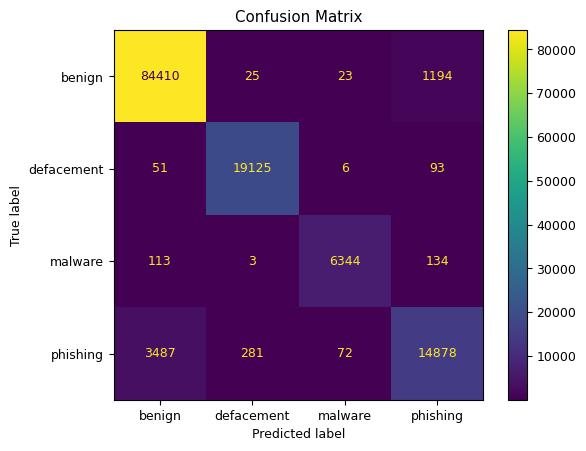

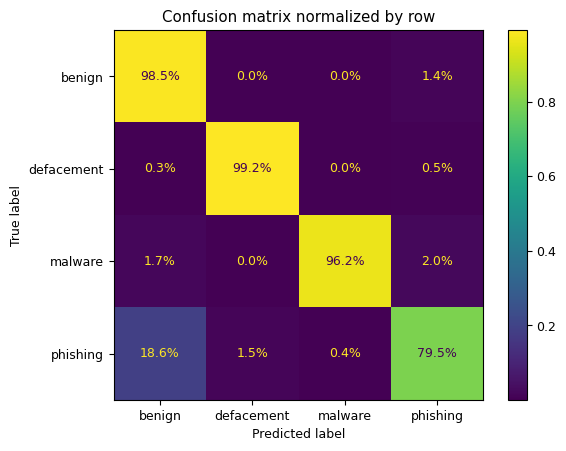

In [ ]:
plt.rc('font', size = 9)
ConfusionMatrixDisplay.from_predictions(label_test, HG_pred)
plt.title('Confusion Matrix')
plt.show()
ConfusionMatrixDisplay.from_predictions(label_test, HG_pred, normalize='true', values_format='.01%')
plt.title('Confusion matrix normalized by row')
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(label_test, HG_pred))
print("F1 Score: ", f1_score(label_test, HG_pred, average = 'macro'))

Accuracy:  0.9579081534716943
F1 Score:  0.9457036473976115


Best Params Found, test on a few urls

In [ ]:
Mal_URL_CLF = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_features = None, random_state = 69)
Mal_URL_CLF.fit(text_train, label_train)

DecisionTreeClassifier(random_state=69)

In [ ]:
#Check = pd.Series(['https://www.google.com/', 'https://www.go0gle.com/', 'https://www.youtube.com/feed/subscriptions', 'coin-hive.com', 'adtrackers.net',
#             'https://docs.google.com/document/d/1EfW2UVO55TejfiSRUObuuZ5FmA2lmgD2lQrJBnQW6hY/edit#heading=h.sldaucjrcbwa', 'advertising.oriel.io', 'uaswitcher.org',
#             'campingforthefunofit.com', 'adserver.wolterskluwer.pl'])
Check = pd.Series('uaswitcher.org')
Check_Pred = Mal_URL_CLF.predict(vectorizer.transform(Check))
print(Check_Pred)

['benign']


In [ ]:
Check = pd.Series('https://www.go0gle.com/')
Check_Pred = Mal_URL_CLF.predict(vectorizer.transform(Check))
print(Check_Pred)

['phishing']


In [ ]:
Check = pd.Series('adtrackers.net')
Check_Pred = Mal_URL_CLF.predict(vectorizer.transform(Check))
print(Check_Pred)

['benign']


In [ ]:
Check = pd.Series('adserver.wolterskluwer.pl')
Check_Pred = Mal_URL_CLF.predict(vectorizer.transform(Check))
print(Check_Pred)

['phishing']


In [ ]:
Check = pd.Series('https://www.kaggle.com/code/swapnilnarwade/malicious-urls/comments')
Check_Pred = Mal_URL_CLF.predict(vectorizer.transform(Check))
print(Check_Pred)

['phishing']


In [ ]:
Check = pd.Series('google.com')
Check_Pred = Mal_URL_CLF.predict(vectorizer.transform(Check))
print(Check_Pred)

['benign']


In [ ]:
Check = pd.Series('go0gle.com')
Check_Pred = Mal_URL_CLF.predict(vectorizer.transform(Check))
print(Check_Pred)

['benign']
